# Fotos apoptosis

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import image_slicer
import os
#from keras.callbacks import CSVLogger

In [ ]:
torch.cuda.device_count()

In [ ]:
torch.cuda.get_device_name()

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Corrida 1. Todas las líneas juntas vs todas las líneas juntas

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/1hSliced'

In [ ]:
fnames = get_image_files(path_img)
#fnames[:5]

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'

In [ ]:
bs = 16

In [ ]:
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [ ]:
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy) #, callback_fns=[CSVLogger])

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20)

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-1erTrainAllTogether')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(12, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix. All together' )
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixAllTog1H_bs16lrn-4-2')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 3, figsize=(6,6), dpi=300, title = 'Confusion matrix. All together', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixAllTog1H_bs16lrn-4-2Norm')

## Corrida 2. Todas las líneas separadas Vs todas las líneas separadas

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/1hSliced'

In [ ]:
np.random.seed(2)
pat = r'.*((PC3_CPT|MCF7_CPT|DCMWT_CPT|FN_CPT|H9_CPT|T47D_CPT|U2_CPT)|(PC3_DMSO|MCF7_DMSO|DCMWT_DMSO|FN_DMSO|H9_DMSO|T47D_DMSO|U2_DMSO)).*'

In [ ]:
bs = 16

In [ ]:
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [ ]:
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-3))

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation50epochsAllSplit_bs16.pdf')

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainAllSplit')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=7)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h')
 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixSplit1H_bs16lrn-4-3')

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation20epochsTodasSeparadas')

In [ ]:
interp.plot_top_losses(12, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60, title = 'Matriz de confusion')


## Corrida 3. Cada linea por separado


### Corrida 3.1 PC3 DMSO vs PC3 CPT

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/PC3'

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'
bs = 16
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-3))

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation50epochsPC3_bs16.pdf')

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainPC31h')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix. PC3',return_fig= True)
 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixPC31h_bs16lrn-4-3')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Normalized confusion matrix. PC3', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixPC31H_bs16lrn-4-3Norm')

### Corrida 3.3 DCMWT

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/DCMWT'

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'

In [ ]:
bs = 16

In [ ]:
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [ ]:
data.train_ds[0][0].shape

In [ ]:
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
print(len(fnames))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-3))

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation21epochsDCMWT_bs16.pdf')

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainDCMWT1h')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix. DCMWT',return_fig= True)
 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixDCMWT1h_bs16lrn-4-2')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Confusion matrix. DCMWT', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixDCMWT1H_bs16lrn-4-2Norm')

### Corrida 3.2 MCF7

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/MCF7'

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'
bs = 16
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainMCF71h')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-5,1e-4))

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation21epochsMCF71H_bs16.pdf')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_top_losses(20, figsize=(15,11), return_fig = 0)

In [ ]:
interp.plot_top_losses(6, figsize=(15,11), largest = False)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix. MCF7',return_fig= True) 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixMCF71h_bs16lrn-5-4')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Confusion matrix. MCF7', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixMCF71H_bs16lrn-5-4Norm')

### Corrida 3.4 FN

In [3]:
path_img = '/DATA/datosNelba/apoptosis/FN'

In [4]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'

In [5]:
bs = 16

In [6]:
fnames = get_image_files(path_img)

In [7]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [8]:
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

['CPT', 'DMSO']


(2, 2, 2228, 556)

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.265696,0.020644,0.996403,00:39


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


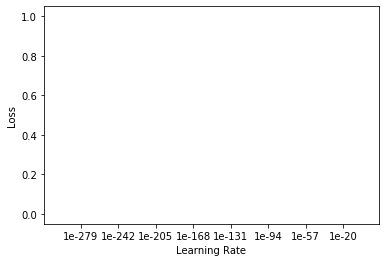

In [14]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainFN1h')

In [15]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.065309,0.019530,0.991007,00:53
1,0.052499,0.009583,0.994604,00:52
2,0.045999,0.024706,0.994604,00:53
3,0.102069,0.143749,0.964029,00:53
4,0.104048,0.040735,0.987410,00:53
5,0.062402,0.139194,0.965827,00:53
6,0.057636,0.047967,0.980216,00:53
7,0.127512,0.100342,0.964029,00:53
8,0.111284,0.067632,0.980216,00:53
9,0.079484,0.017396,0.994604,00:53


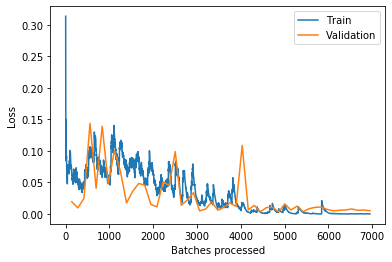

In [16]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation21epochsFN1H_bs16.pdf')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [18]:
interp.most_confused(min_val=2)

[('CPT', 'DMSO', 2)]

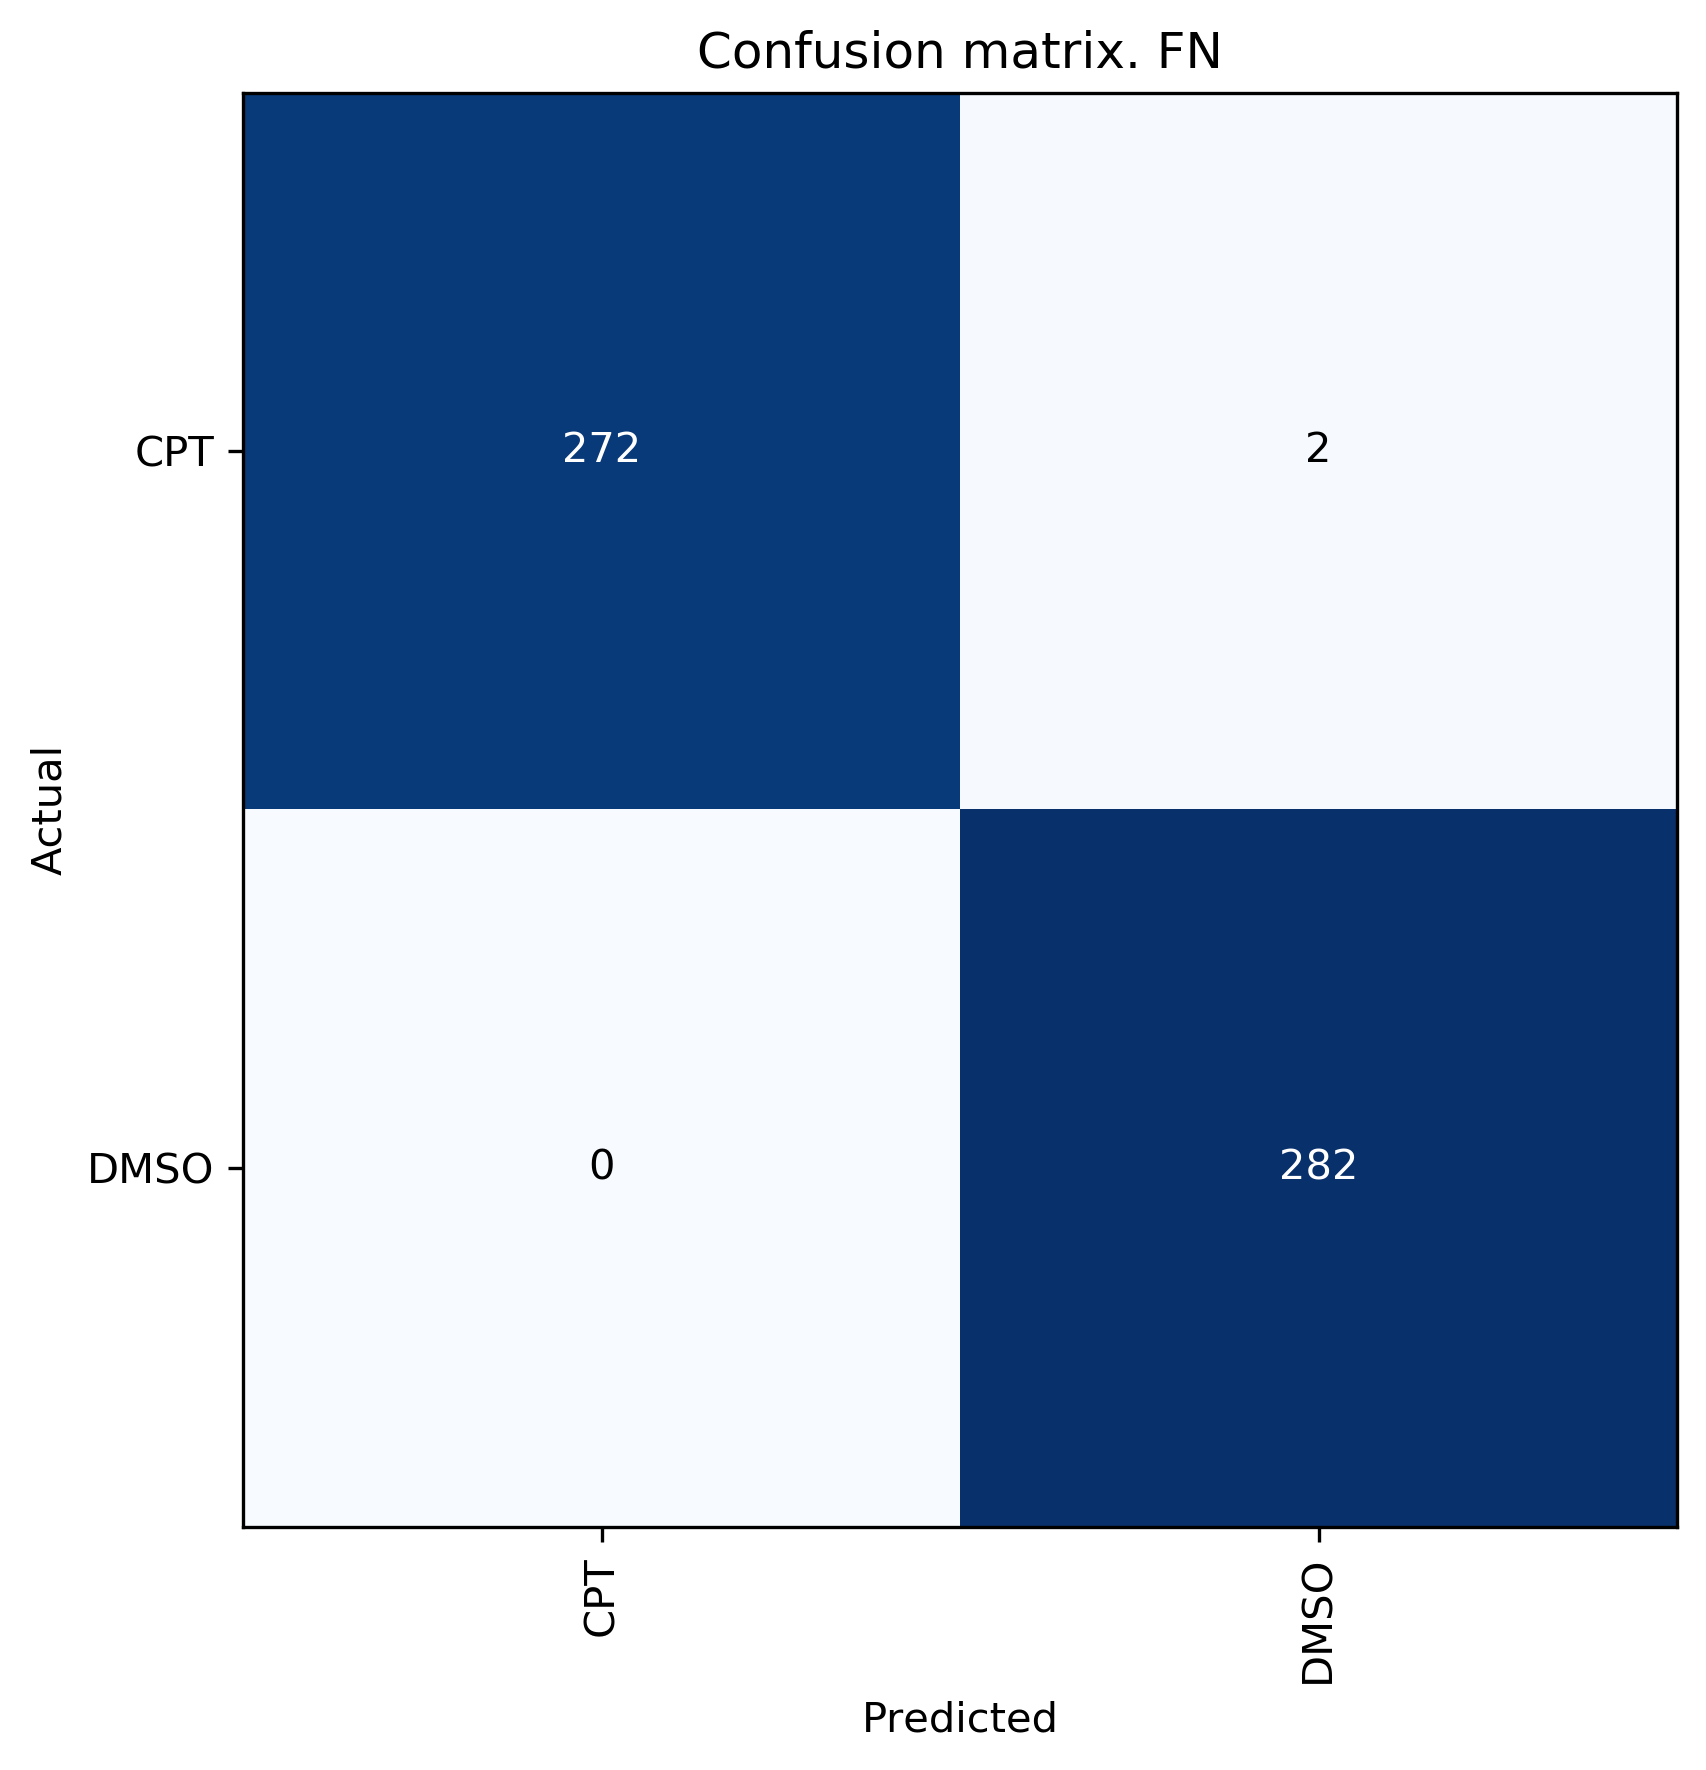

In [19]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix. FN',return_fig= True)
 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixFN1h_bs16lrn-4-3')

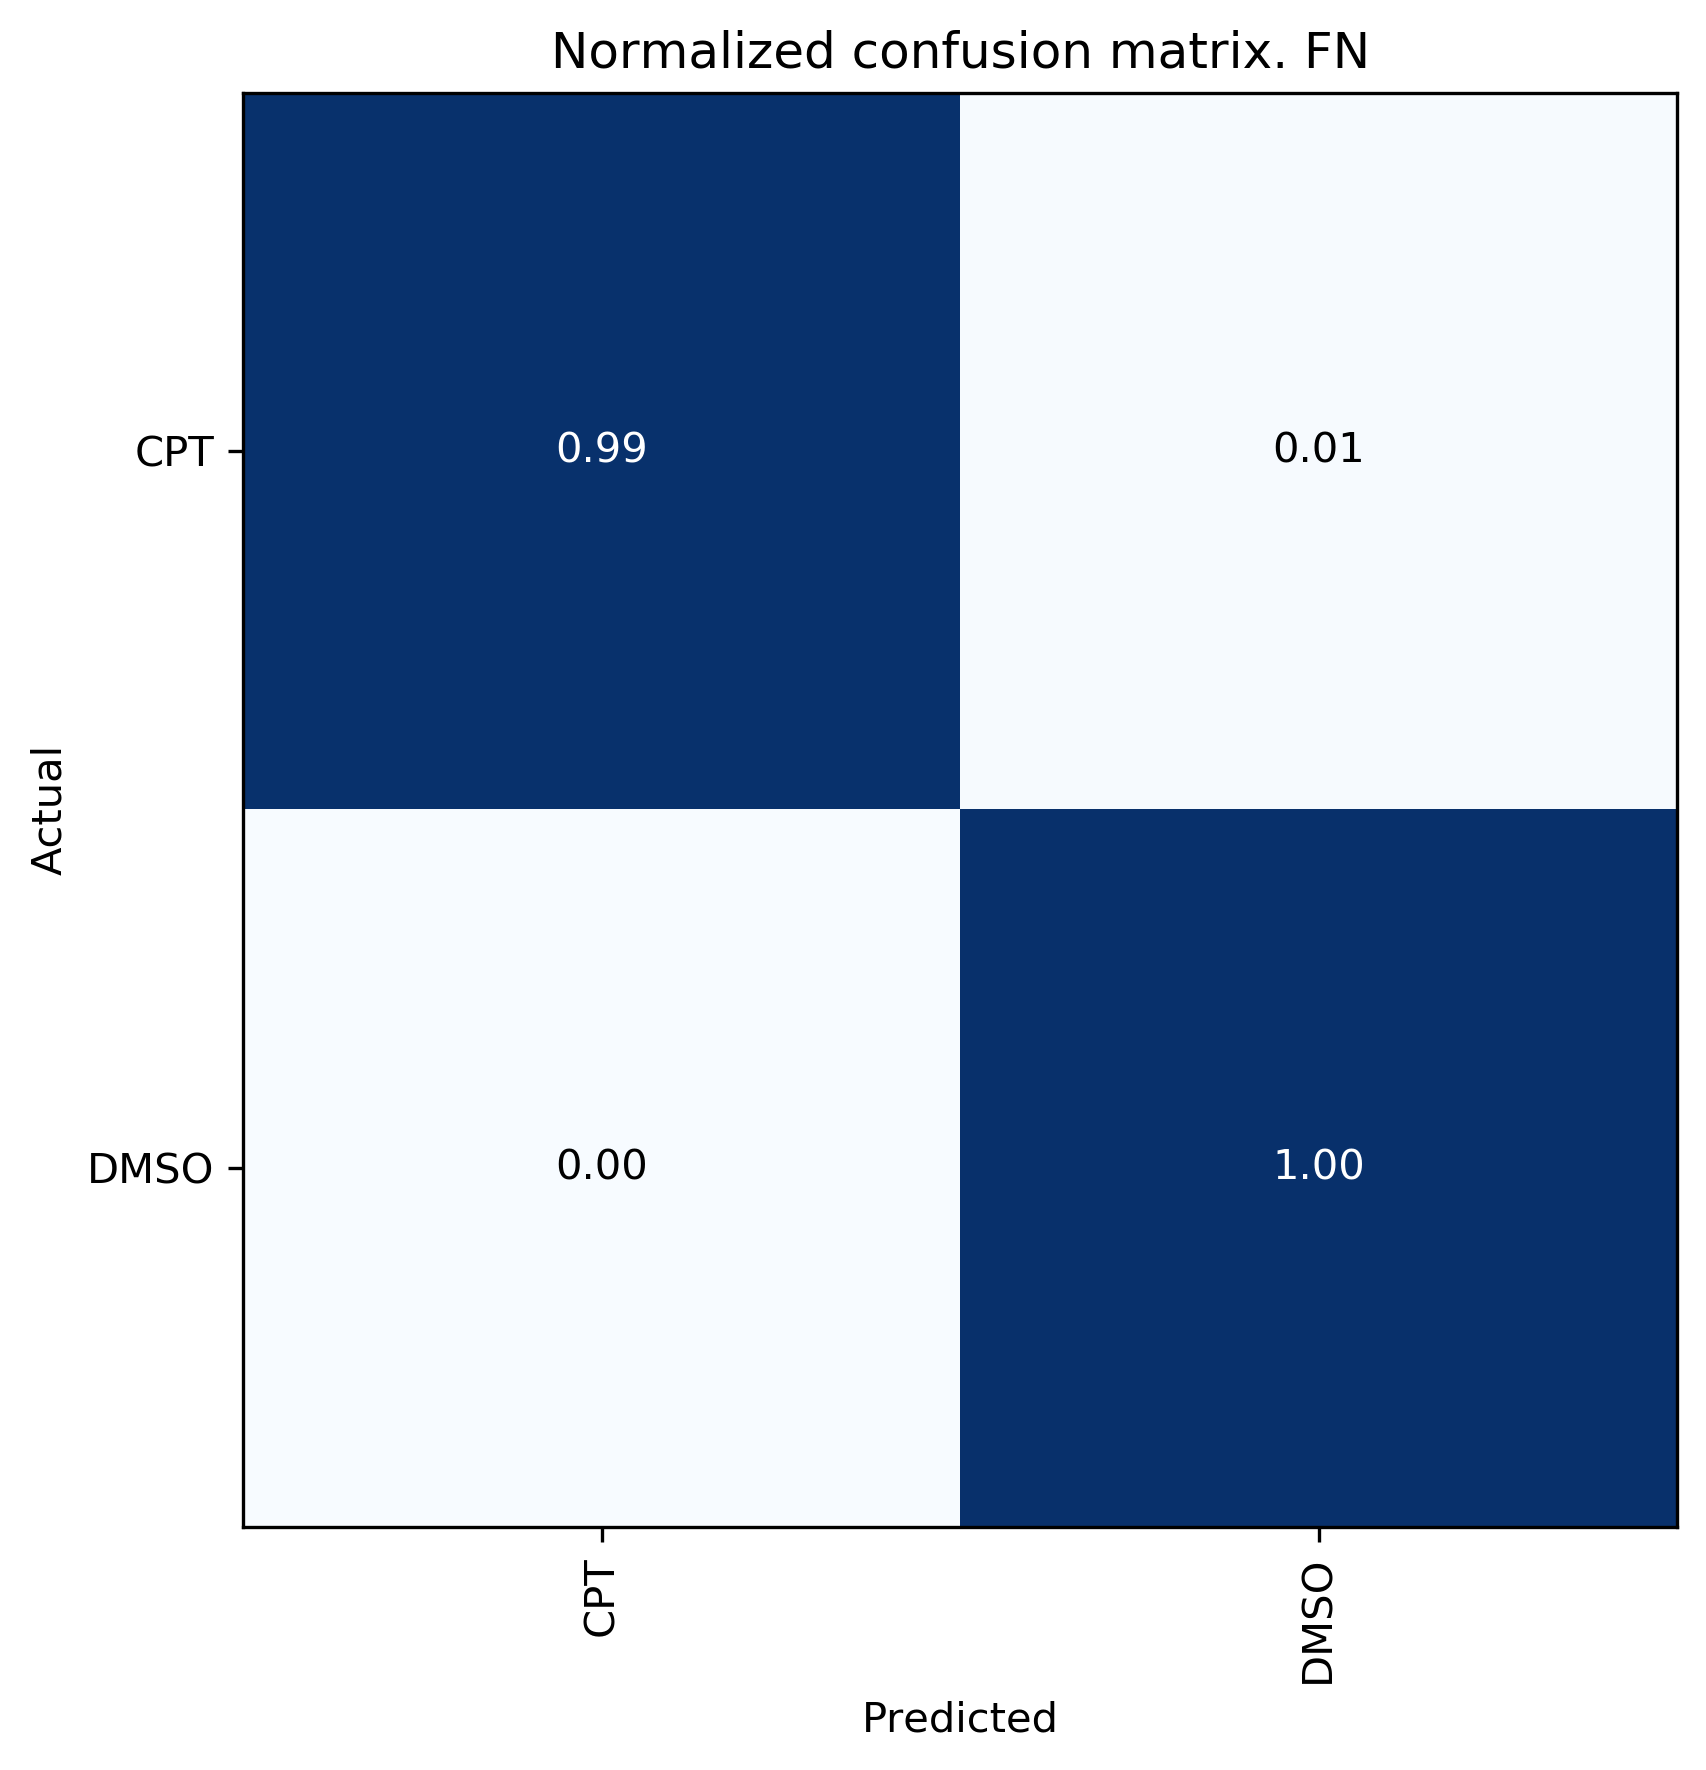

In [20]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Normalized confusion matrix. FN', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixFN1H_bs16lrn-4-3Norm')

### Corrida 3.5 H9

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/H9'

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'

In [ ]:
bs = 16

In [ ]:
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [ ]:
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation21epochsH91H_bs16.pdf')

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainH91h')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix H9',return_fig= True)
 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixH91h_bs16lrn-5-3')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Confusion matrix. H9', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixH91H_bs16lrn-5-3Norm')

### Corrida 3.6 T47D

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/T47D'

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'
bs = 16
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation21epochsT47D1H_bs16.pdf')

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainT47D1h')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix T47D',return_fig= True)
 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixT47D1h_bs16lrn-4-2')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Confusion matrix. T47D', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixT47D1H_bs16lrn-4-2Norm')

### Corrida 3.7 U2

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/U2'

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'
bs = 16
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation21epochsU21H_bs16.pdf')

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainU21h')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix. U2',return_fig= True) 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixU21h_bs16lrn-4-3')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Confusion matrix. U2', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixU21H_bs16lrn-4-3Norm')

## Corrida 4. Todas menos una linea

## Menos PC3

In [ ]:
path_img = '/DATA/datosNelba/apoptosis/menosPC3'

In [ ]:
path_test = '/DATA/datosNelba/apoptosis/PC3/'

In [ ]:
np.random.seed(2)
pat = r'.*(CPT|DMSO).*'
bs = 16
fnames = get_image_files(path_img)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs, test = path_test)
print(data.classes)
len(data.classes),data.c , len(data.train_ds), len(data.valid_ds)

In [ ]:
len(test)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation21epochsMenosPC3_bs16.pdf')

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-TrainMenosPC3')

In [ ]:
learn.load('/home/nperez/resultadosApoptosis/stage-1-50-TrainMenosPC3')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-6,1e-4))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_top_losses(20, figsize=(15,11), return_fig = 0)

In [ ]:
interp.plot_top_losses(6, figsize=(15,11), largest = False)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix. Without PC3',return_fig= True) 
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixMenosPC3_bs16lrn-4-2')

In [ ]:
interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Confusion matrix. Without PC3', return_fig= True)
plt.tight_layout()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixMenosPC3_bs16lrn-4-2Norm')

Test

In [ ]:
test = get_image_files(path_test)

In [ ]:
path = '/home/nperez/resultadosApoptosis/'

In [ ]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [ ]:
labelled_preds[:5]

In [ ]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [ ]:
len(fnames)

In [ ]:
fnames[0]

In [ ]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [ ]:
df.to_csv('/home/nperez/resultadosApoptosis/predictionPC3.csv', index=False)

## Menos DCMWT

## Menos MCF7

## Menos FN

## Menos H9

## Menos T47D

## Menos U2

# Customized data augmentation

In [ ]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_lighting=0.1)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=tfms, bs=bs
                                  ).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.5)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.save('/home/nperez/resultadosApoptosis/stage-1-50-1erTrainAllTogetherDataAugNormLr-4-2_otro')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(50, max_lr=slice(1e-4,1e-2))

In [ ]:
learn.recorder.plot_losses()
plt.savefig('/home/nperez/resultadosApoptosis/grafTrainVsValidation50epochsTodas1H_bs16.pdf')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(12, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
import matplotlib as mpl

mpl.rcParams["font.size"] = 6
fig = interp.plot_confusion_matrix(normalize= True, norm_dec= 2, figsize=(6,6), dpi=300, title = 'Splited. Normalized confusion matrix. ', return_fig= True)
plt.tight_layout()
plt.colorbar()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixSplited1H_bs16lrn-4-2_Norm')

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Splited. Confusion matrix.' )
plt.tight_layout()
plt.colorbar()
plt.savefig('/home/nperez/resultadosApoptosis/cMatrixSplited1H_bs16lrn-4-3')

#       data augmentation customizada y datos sin normalizar

In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=tfms, bs=bs)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(9)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h DA: ?')

# Sin data augmentation con datos normalizados

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(9)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix normalized')

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300, title = 'Confusion matrix 1h')
#sns.set(font_scale=3.0) 
plt.tight_layout()
#plt.savefig('/home/nperez/resultadosApoptosis/cMatrixTodas1H_bs16.pdf')

# Cross-validation

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=bs)

In [ ]:
df = data.to_df()
df.head()

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
acc_val = []
torch.cuda.device_count()
for train_index, val_index in skf.split(df.index, df['y']):
    data_fold = (ImageList.from_df(df, path_img).split_by_idxs(train_index, val_index)
                .label_from_df().databunch(num_workers=0))
    learn = cnn_learner(data_fold, models.resnet50, metrics=error_rate)
    learn.fit_one_cycle(8)
    loss, acc = learn.validate()
    acc_val.append(acc.numpy())

In [ ]:
np.mean(acc_val)

In [ ]:
np.std(acc_val)